
------------
<h1 align='center'>  <font size = '6' color='red'> Math Foundations for Data Science <font> </h1>
<br>
<center><h2> <center> <font size = '6' color='green'> Probability and Statistics Module <font> </h2> </center>

<center><h2> <center> <fontsize = '4' color='green'> CHAPTER 1: Basic Concepts in Probability and Statistics <font> </h2> </center>
<br>
    
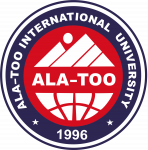
<br>
<!-- <center align="left"> Developed for the MSc Program in Data Science  </center> -->
 
<center align="left"> Ala-too International University </center>
    
  <center align="left">    <center align="left"><center align="left"> <font color='dark blue'><font style= 'bold' size='3' color='dark'>  Instructor: Dr Remudin Reshid MEKURIA <font> </center>
      
   
      
      



# Table of Contents
> ### What is Probability Theory?
>>  A simple (?) question<br>
>>  Simulating coin flips<br>
>>  Summary<br>
> ### What is Statistics?
>> The Logic of Statistical inference<br>
>> Real world examples<br>
> ### Statistics Fundamentals
>> Analyzing Data Distribution <br>
>> Measures of Central Tendency <br>
> ###  Permutations and Combinations
>> Permutations <br>
>> Combinations <br>
>> Stirling's approximation <br>
> ###  Probability basics
>> Conditional probability and dependence <br>
>> Binomial Variables and Distributions <br>


In [2]:
%matplotlib inline

# What is Probability Theory?

Probability Theory is a **mathematical** framework for computing the probability of complex events. Under the assumption that **we know the probabilities of the basic events.**

## A simple (?) question
We all know that if one flips a fair coin then the outcome is "heads" or "tails" with equal probabilities.

What does that mean? 

It means that if we flip the coin $k$ times, for some large value of $k$, say $k=10,000$, 

Then the number of "heads" is **about** $\frac{k}{2}=\frac{10,000}{2} = 5,000$

What do we mean by **about** ??

## Simulating coin flips

We will use the pseudo random number generators in `numpy` to simulate the coin flips. 

instead of "Heads" and "Tails" we will use $x_i=1$ or $x_i=-1$ and consider the sum $S_{10000} = x_1+x_2+\cdots+x_{10000}$.

If the number of heads is about 5,000 then $S_{10000}\approx 0$

We will vary the number of coin flips, which we denote by $k$

In [3]:
# Generate the sum of k coin flips, repeat that n times
def generate_counts(k=1000,n=100):
    X=2*(random.rand(k,n)>0.5)-1  # generate a kXn matrix of +-1 random numbers
    S=sum(X,axis=0) 
    return S 

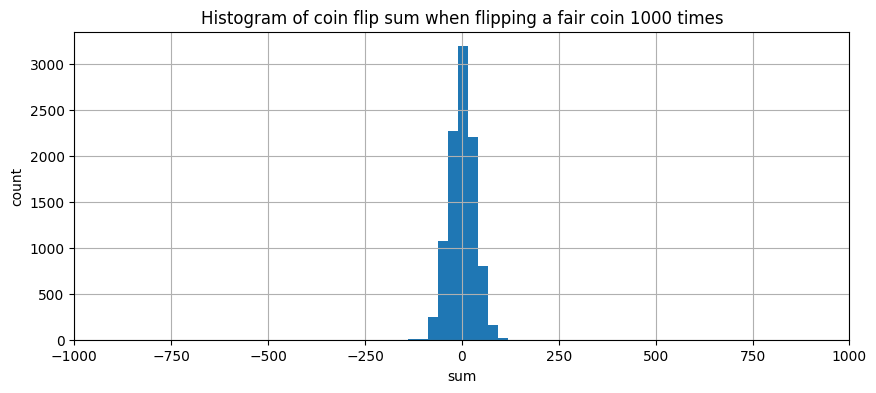

In [9]:

k=1000
n=10000
counts=generate_counts(k=k,n=n)
figure(figsize=[10,4])
hist(counts);
xlim([-k,k])
xlabel("sum")
ylabel("count")
title("Histogram of coin flip sum when flipping a fair coin %d times"%k)
grid()

Note that the sum $S_{1000}$ is not **exactly** $0$, it is only **close to** $0$.

Using **probability theory** we can calculate **how small** is $\big|S_k\big|$

In a later lesson we will show that the probability that 
$$\big| S_k \big| \geq 4\sqrt{k}$$ is smaller than $2 \times 10^{-8}$ which is $0.000002\%$. **[Exercise: Why do we have this?]**

Let's use our simulation to demonstrate that this is the case:

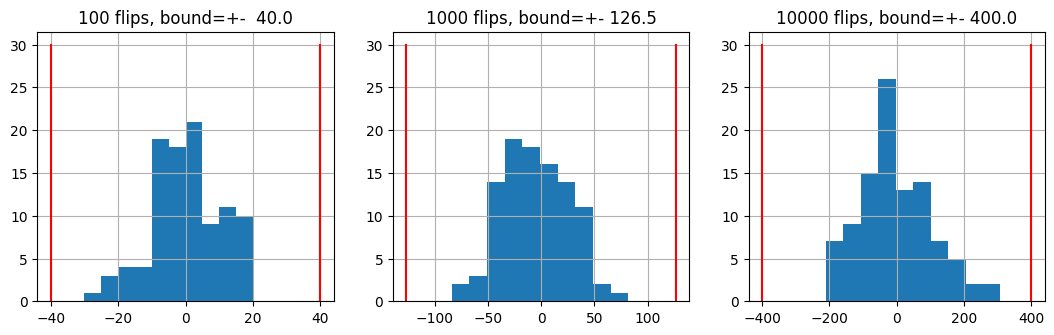

In [10]:
from math import sqrt
figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts=generate_counts(k=k,n=100)
    subplot(130+j-1)
    hist(counts,bins=10);
    d=4*sqrt(k)
    plot([-d,-d],[0,30],'r')
    plot([+d,+d],[0,30],'r')
    grid()
    title('%d flips, bound=+-%6.1f'%(k,d))


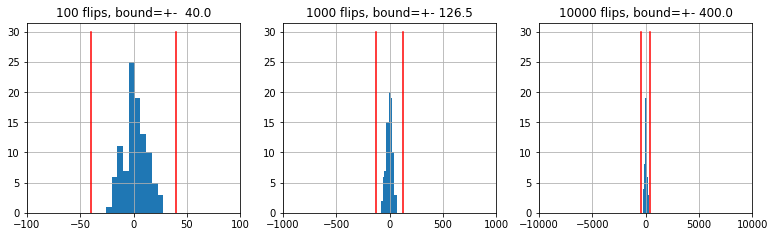

In [5]:
figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts=generate_counts(k=k,n=100)
    subplot(130+j-1)
    hist(counts,bins=10);
    xlim([-k,k])
    d=4*sqrt(k)
    plot([-d,-d],[0,30],'r')
    plot([+d,+d],[0,30],'r')
    grid()
    title('%d flips, bound=+-%6.1f'%(k,d))


## Summary
We did some experiments summing $k$ random numbers: $S_k=x_1+x_2+\cdots+x_k$

$x_i=-1$ with probability $1/2$, $x_i=+1$ with probability $1/2$

Our experiments show that the sum $S_k$ is (almost) always in the range $\big[-4\sqrt{k},+4\sqrt{k}\big]$ 


$$\mbox{ If } k \to \infty,\;\;\; \frac{4 \sqrt{k}}{k} = \frac{4}{\sqrt{k}} \to 0$$

$$ \mbox{Therefor if }\;\;k \to \infty,  \frac{S_k}{k} \to 0$$

In summary we can say that, probability theory is the math involved in **proving** (a precise version of) the statements above.

In most cases, we can **approximate** probabilities using simulations (Monte-Carlo simulations)

Calculating the probabilities is better because:

* It provides a precise answer

* It is much faster than Monte Carlo simulations.

# What is statistics?

Probability theory computes probabilities of complex events given the underlying base probabilities.

Statistics takes us in the opposite direction.

We are given **data** that was generated by a **Stochastic process**

We **infer** properties of the underlying base probabilities.

# Example:  deciding whether a coin is biased.

In the above lecture we discussed the distribution of the number of heads when flipping a fair coin many times.

Let's turn the question around: **we flip a coin 1000 times and get 570 heads.** 

Can we conclude that the coin is biased (not fair) ?

What can we conclude if we got 507 heads?

### The Logic of Statistical inference
The answer uses the following logic.

* Suppose that the coin is fair. 

* Use **probability theory** to compute the probability of getting at least 570 (or 507) heads.

* If this probability is very small, then we can **reject** <font color='red'>with confidence</font> the hypothesis that the coin is fair.

## Calculating the answer
Recall the simulations we did in above "What is probability".

We used $x_i=-1$ for tails and $x_i=+1$ for heads.

We looked at the sum $S_k=\sum_{i=1}^k x_i$, here $k=1000$.

If number of heads is $570$ then $S_{1000} = 570-430 = 140$  

It is very unlikely that $|S_{1000}| > 4\sqrt{k} \approx 126.5$

In [11]:
from math import sqrt
4*sqrt(1000)

126.49110640673517

It is very unlikely that the coin is unbiased.

### What about 507 heads?

507 heads = 493 tails $ \Rightarrow S_n = 14$,       $\;\;\;14 \ll 126.5$

We cannot conclude that coin is biased.

## Conclusion
The probability that an unbiased coin would generate a sequence with 570 or more heads is extremely small. From which we can conclude, <font color='red'>with high confidence</font>, that the coin **is** biased.

On the other hand, $\big| S_{1000} \big | \geq 507$ is quite likely. So getting 507 heads does not provide evidence that the coin is biased.

# Real-World examples
You might ask "why should I care whether a coin is biased?"

* This is a valid critique. 
* We will give a few real-world cases in which we want to know whether a "coin" is biased or not.

## Case I: Polls
* Suppose elections will take place in a few days and we want to know how people plan to vote.

* Suppose there are just two parties: **D** and **R**.

* We could try and ask **all** potential voters.

* That would be very expensive.

* Instead, we can use a poll: call up a small randomly selected set of people.

* Call $n$ people at random and count the number of **D** votes.

* Can you say <font color='red'>with confidence</font> that there are more **D** votes, or more **R** votes?

* Mathematically equivalent to flipping a biased coin and 

* asking whether you can say <font color='red'>with confidence</font> that it is biased towards "Heads" or towards "Tails"

## Case 2: A/B testing
A common practice when optimizing a web page is to perform A/B tests.

* A/B refer to two alternative designs for the page.

![AB](images/AB.png)

* To see which design users prefer we randomly present design A or design B.


* We measure how long the user stayed on a page, or whether the user clicked on an advertisement.

* We want to decide, <font color='red'>with confidence</font>, which of the two designs is better.

* Again: similar to making a decision <font color='red'>with confidence</font> on whether "Heads" is more probably than "Tails" or vice versa.

# Summary
Statistics is about analyzing real-world data and drawing conclusions.

Examples include:

* Using polls to estimate public opinion.

* performing A/B tests to design web pages

* Estimating the rate of global warming.

* Deciding whether a medical procedure is effective

# Statistics Fundamentals
Statistics is primarily about analyzing data samples, and that starts with uderstanding the distribution of data in a sample.

## Analyzing Data Distribution
A great deal of statistical analysis is based on the way that data values are distributed within the dataset. In this section, we'll explore some statistics that you can use to tell you about the values in a dataset.

### Measures of Central Tendency
The term *measures of central tendency* sounds a bit grand, but really it's just a fancy way of saying that we're interested in knowing where the middle value in our data is. For example, suppose decide to conduct a study into the comparative salaries of people who graduated from the same school. You might record the results like this:

| Name     | Salary      |
|----------|-------------|
| Dan      | 50,000      |
| Joann    | 54,000      |
| Pedro    | 50,000      |
| Rosie    | 189,000     |
| Ethan    | 55,000      |
| Vicky    | 40,000      |
| Frederic | 59,000      |

Now, some of the former-students may earn a lot, and others may earn less; but what's the salary in the middle of the range of all salaries?

#### Mean
A common way to define the central value is to use the *mean*, often called the *average*. This is calculated as the sum of the values in the dataset, divided by the number of observations in the dataset. When the dataset consists of the full population, the mean is represented by the Greek symbol ***&mu;*** (*mu*), and the formula is written like this:

\begin{equation}\mu = \frac{\displaystyle\sum_{i=1}^{N}X_{i}}{N}\end{equation}

More commonly, when working with a sample, the mean is represented by ***x&#772;*** (*x-bar*), and the formula is written like this (note the lower case letters used to indicate values from a sample):

\begin{equation}\bar{x} = \frac{\displaystyle\sum_{i=1}^{n}x_{i}}{n}\end{equation}

In the case of our list of heights, this can be calculated as:

\begin{equation}\bar{x} = \frac{50000+54000+50000+189000+55000+40000+59000}{7}\end{equation}

Which is **71,000**.

>In technical terminology, ***x&#772;*** is a *statistic* (an estimate based on a sample of data) and ***&mu;*** is a *parameter* (a true value based on the entire population). A lot of the time, the parameters for the full population will be impossible (or at the very least, impractical) to measure; so we use statistics obtained from a representative sample to approximate them. In this case, we can use the sample mean of salary for our selection of surveyed students to try to estimate the actual average salary of all students who graduate from our school.

In Python, when working with data in a *pandas.dataframe*, you can use the ***mean*** function, like this:

In [1]:
import pandas as pd


df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

print (df['Salary'].mean())

71000.0


So, is **71,000** really the central value? Or put another way, would it be reasonable for a graduate of this school to expect to earn $71,000? After all, that's the average salary of a graduate from this school.

If you look closely at the salaries, you can see that out of the seven former students, six earn less than the mean salary. The data is *skewed* by the fact that Rosie has clearly managed to find a much higher-paid job than her classmates.

#### Median
OK, let's see if we can find another definition for the central value that more closely reflects the expected earning potential of students attending our school. Another measure of central tendancy we can use is the *median*. To calculate the median, we need to sort the values into ascending order and then find the middle-most value. When there are an odd number of observations, you can find the position of the median value using this formula (where *n* is the number of observations):

\begin{equation}\frac{n+1}{2}\end{equation}

Remember that this formula returns the *position* of the median value in the sorted list; not the value itself.

If the number of observations is even, then things are a little (but not much) more complicated. In this case you calculate the median as the average of the two middle-most values, which are found like this:

\begin{equation}\frac{n}{2} \;\;\;\;and \;\;\;\; \frac{n}{2} + 1\end{equation}

So, for our graduate salaries; first lets sort the dataset:

| Salary      |
|-------------|
| 40,000      |
| 50,000      |
| 50,000      |
| 54,000      |
| 55,000      |
| 59,000      |
| 189,000     |

There's an odd number of observation (7), so the median value is at position (7 + 1) &div; 2; in other words, position 4:

| Salary      |
|-------------|
| 40,000      |
| 50,000      |
| 50,000      |
|***>54,000*** |
| 55,000      |
| 59,000      |
| 189,000     |

So the median salary is **54,000**.

The *pandas.dataframe* class in Python has a ***median*** function to find the median:

In [8]:
import pandas as pd


df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

print (df['Salary'].median())

54000.0


#### Mode
Another related statistic is the *mode*, which indicates the most frequently occurring value. If you think about it, this is potentially a good indicator of how much a student might expect to earn when they graduate from the school; out of all the salaries that are being earned by former students, the mode is earned by more than any other.

Looking at our list of salaries, there are two instances of former students earning **50,000**, but only one instance each for all other salaries:

| Salary      |
|-------------|
| 40,000      |
|***>50,000***|
|***>50,000***|
| 54,000      |
| 55,000      |
| 59,000      |
| 189,000     |

The mode is therefore **50,000**.

As you might expect, the *pandas.dataframe* class has a ***mode*** function to return the mode:

In [2]:
import pandas as pd


df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

print (df['Salary'].mode())

0    50000
dtype: int64


##### Multimodal Data
It's not uncommon for a set of data to have more than one value as the mode. For example, suppose Ethan receives a raise that takes his salary to **59,000**:

| Salary      |
|-------------|
| 40,000      |
|***>50,000***|
|***>50,000***|
| 54,000      |
|***>59,000***|
|***>59,000***|
| 189,000     |

Now there are two values with the highest frequency. This dataset is *bimodal*. More generally, when there is more than one mode value, the data is considered *multimodal*.

The *pandas.dataframe.**mode*** function returns all of the modes:

In [3]:
import pandas as pd


df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,59000,40000,59000]})

print (df['Salary'].mode())

0    50000
1    59000
dtype: int64


### Distribution and Density
Now we know something about finding the center, we can start to explore how the data is distributed around it. What we're interested in here is understanding the general "shape" of the data distribution so that we can begin to get a feel for what a 'typical' value might be expected to be.

We can start by finding the extremes - the minimum and maximum. In the case of our salary data, the lowest paid graduate from our school is Vicky, with a salary of **40,000**; and the highest-paid graduate is Rosie, with **189,000**.

The *pandas.dataframe* class has ***min*** and ***max*** functions to return these values.

Run the following code to compare the minimum and maximum salaries to the central measures we calculated previously:

In [4]:
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

print ('Min: ' + str(df['Salary'].min()))
print ('Mode: ' + str(df['Salary'].mode()[0]))
print ('Median: ' + str(df['Salary'].median()))
print ('Mean: ' + str(df['Salary'].mean()))
print ('Max: ' + str(df['Salary'].max()))

Min: 40000
Mode: 50000
Median: 54000.0
Mean: 71000.0
Max: 189000


We can examine these values, and get a sense for how the data is distributed - for example, we can see that the *mean* is closer to the max than the *median*, and that both are closer to the *min* than to the *max*.

However, it's generally easier to get a sense of the distribution by visualizing the data. Let's start by creating a histogram of the salaries, highlighting the *mean* and *median* salaries (the *min*, *max* are fairly self-evident, and the *mode* is wherever the highest bar is):

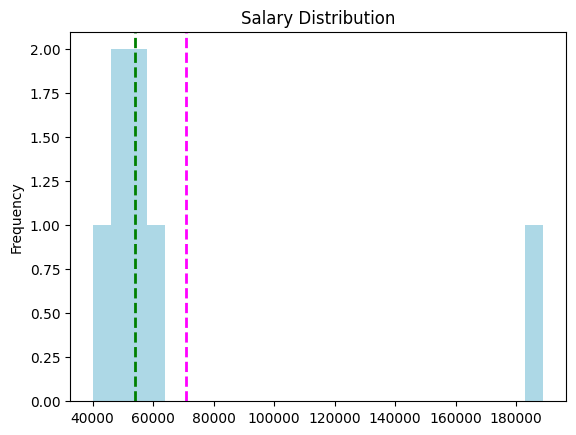

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

salary = df['Salary']
salary.plot.hist(title='Salary Distribution', color='lightblue', bins=25)  
plt.axvline(salary.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(salary.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

The <span style="color:magenta">***mean***</span> and <span style="color:green">***median***</span> are shown as dashed lines. Note the following:
- *Salary* is a continuous data value - graduates could potentially earn any value along the scale, even down to a fraction of cent.
- The number of bins in the histogram determines the size of each salary band for which we're counting frequencies. Fewer bins means merging more individual salaries together to be counted as a group.
- The majority of the data is on the left side of the histogram, reflecting the fact that most graduates earn between 40,000 and 55,000
- The mean is a higher value than the median and mode.
- There are gaps in the histogram for salary bands that nobody earns.

The histogram shows the relative frequency of each salary band, based on the number of bins. It also gives us a sense of the *density* of the data for each point on the salary scale. With enough data points, and small enough bins, we could view this density as a line that shows the shape of the data distribution.

Run the following cell to show the density of the salary data as a line on top of the histogram:

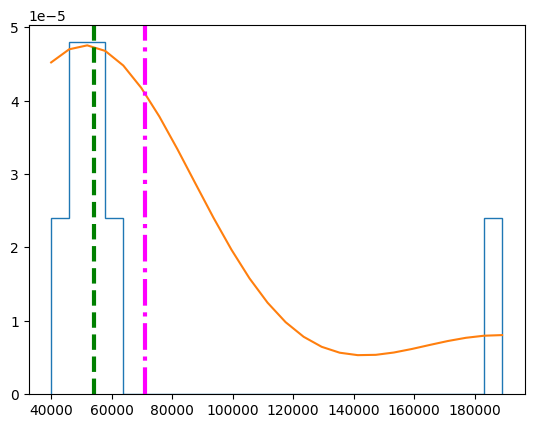

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

salary = df['Salary']
density = stats.gaussian_kde(salary)
n, x, _ = plt.hist(salary, histtype='step', density=True, bins=25)  
plt.plot(x, density(x)*5)
plt.axvline(salary.mean(), color='magenta', linestyle='dashdot', linewidth=3)
plt.axvline(salary.median(), color='green', linestyle='dashed', linewidth=3)
plt.show()


Note that the density line takes the form of an asymmetric curve that has a "peak" on the left and a long tail on the right. We describe this sort of data distribution as being *skewed*; that is, the data is not distributed symmetrically but "bunched together" on one side. In this case, the data is bunched together on the left, creating a long tail on the right; and is described as being *right-skewed* because some infrequently occurring high values are pulling the *mean* to the right.

Let's take a look at another set of data. We know how much money our graduates make, but how many hours per week do they need to work to earn their salaries? Here's the data:

| Name     | Hours |
|----------|-------|
| Dan      | 41    |
| Joann    | 40    |
| Pedro    | 36    |
| Rosie    | 30    |
| Ethan    | 35    |
| Vicky    | 39    |
| Frederic | 40    |

Run the following code to show the distribution of the hours worked:

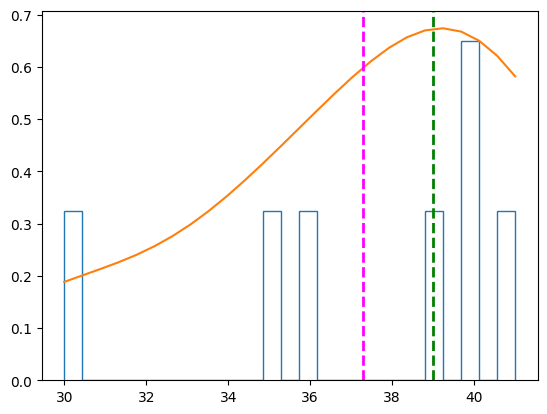

In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[41,40,36,30,35,39,40]})

hours = df['Hours']
density = stats.gaussian_kde(hours)
n, x, _ = plt.hist(hours, histtype='step', density=True, bins=25)  
plt.plot(x, density(x)*7)
plt.axvline(hours.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(hours.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Once again, the distribution is skewed, but this time it's **left-skewed**. Note that the curve is asymmetric with the <span style="color:magenta">***mean***</span> to the left of the <span style="color:green">***median***</span> and the *mode*; and the average weekly working hours skewed to the lower end.

Once again, Rosie seems to be getting the better of the deal. She earns more than her former classmates for working fewer hours. Maybe a look at the test scores the students achieved on their final grade at school might help explain her success:

| Name     | Grade |
|----------|-------|
| Dan      | 50    |
| Joann    | 50    |
| Pedro    | 46    |
| Rosie    | 95    |
| Ethan    | 50    |
| Vicky    | 5     |
| Frederic | 57    |

Let's take a look at the distribution of these grades:

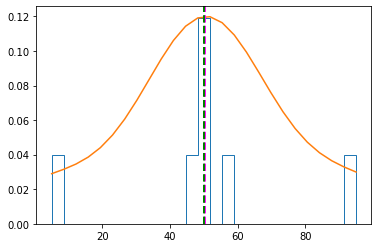

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Grade':[50,50,46,95,50,5,57]})

grade = df['Grade']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, histtype='step', density=True, bins=25)  
plt.plot(x, density(x)*7.5)
plt.axvline(grade.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(grade.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

This time, the distribution is symmetric, forming a "bell-shaped" curve. The <span style="color:magenta">***mean***</span>, <span style="color:green">***median***</span>, and mode are at the same location, and the data tails off evenly on both sides from a central peak.

Statisticians call this a *normal* distribution (or sometimes a *Gaussian* distribution), and it occurs quite commonly in many scenarios due to something called the *Central Limit Theorem*, which reflects the way continuous probability works - more about that later.

#### Skewness and Kurtosis
You can measure *skewness* (in which direction the data is skewed and to what degree) and kurtosis (how "peaked" the data is) to get an idea of the shape of the data distribution. In Python, you can use the ***skew*** and ***kurt*** functions to find this:

**Reading Assignment 1: What are the formulas used to measure the Skewness and Kurtosis?**


In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,30,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})
df


,Name,Salary,Hours,Grade
0,Dan,50000,41,50
1,Joann,54000,40,50
2,Pedro,50000,36,46
3,Rosie,189000,30,95
4,Ethan,55000,35,50
5,Vicky,40000,39,5
6,Frederic,59000,40,57


Salary skewness: 2.57316410755049
Salary kurtosis: 6.719828837773431


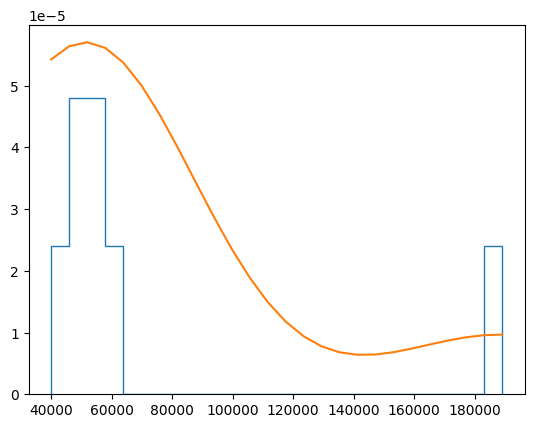



Hours skewness: -1.194570307262883
Hours kurtosis: 0.9412265624999989


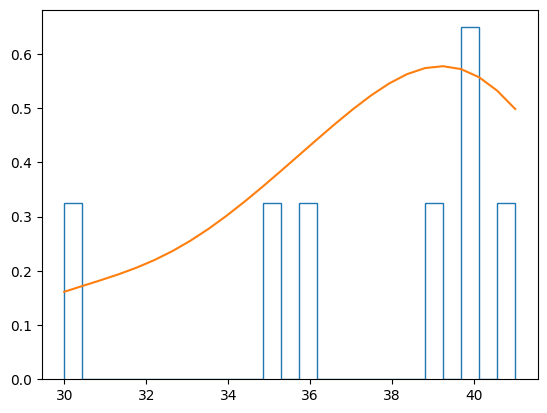



Grade skewness: -0.06512433009682762
Grade kurtosis: 2.7484764913773034


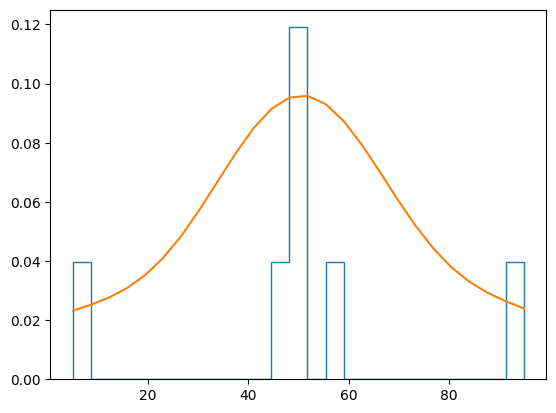

In [16]:
numcols = ['Salary', 'Hours', 'Grade']
for col in numcols:
    print(df[col].name + ' skewness: ' + str(df[col].skew()))
    print(df[col].name + ' kurtosis: ' + str(df[col].kurt()))
    density = stats.gaussian_kde(df[col])
    n, x, _ = plt.hist(df[col], histtype='step', density=True, bins=25)  
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')

**Reading Assignment 2: Caculate the Skewness and Kurtosis for the above cases and confirm if the values match.**


Next Class From Here!